# Exercise 3:  Cross-validation as resampling techniques, adding more complexity (score 15 points)


### Exercise 3:  Cross-validation as resampling techniques, adding more complexity (score 15 points)

The aim here is to write your own code for another widely popular
resampling technique, the so-called cross-validation method.  Again,
before you start with cross-validation approach, you should scale your
data.

Implement the $k$-fold cross-validation algorithm (write your own
code) and evaluate again the MSE function resulting
from the test folds. You can compare your own code with that from
**Scikit-Learn** if needed. 

Compare the MSE you get from your cross-validation code with the one
you got from your **bootstrap** code. Comment your results. Try $5-10$
folds.  You can also compare your own cross-validation code with the
one provided by **Scikit-Learn**.


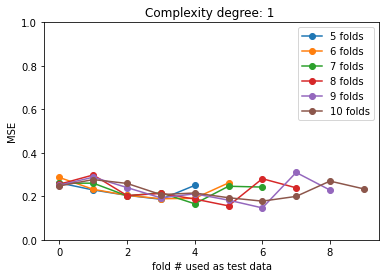

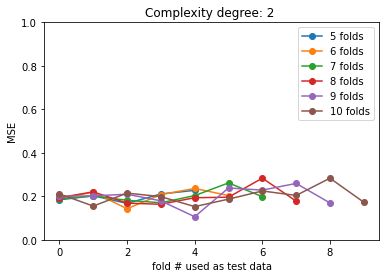

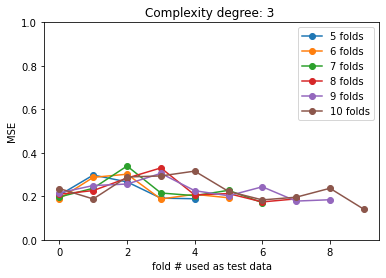

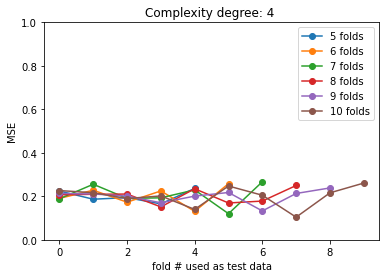

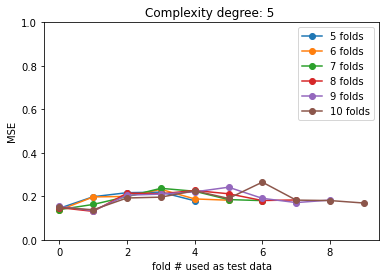

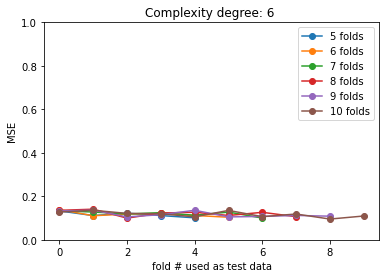

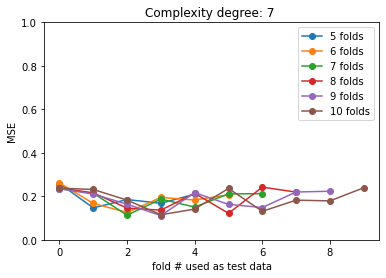

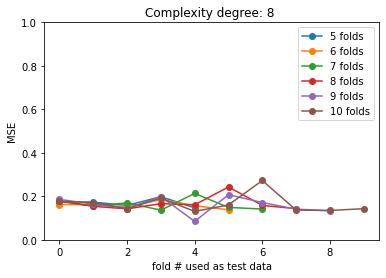

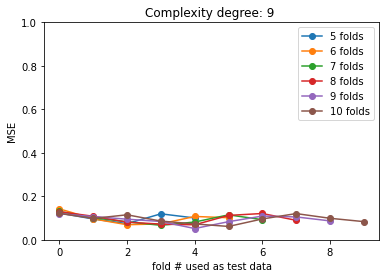

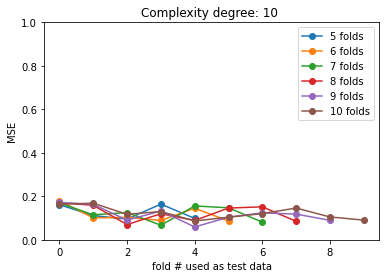

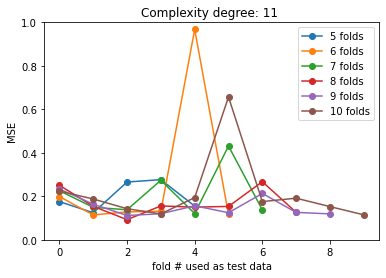

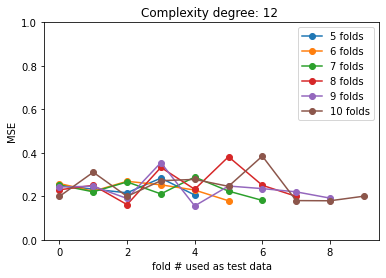

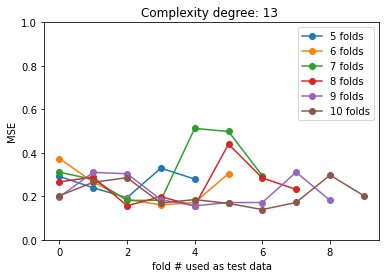

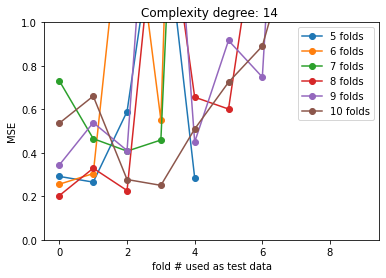

In [5]:
import numpy as np
from common import *
from sklearn.model_selection import cross_val_score
from sklearn import linear_model


#generate some data: 
np.random.seed(4155)
n = 20
x = np.sort(np.random.uniform(0, 1, n))
y = np.sort(np.random.uniform(0, 1, n))
x,y = np.meshgrid(x,y)



for degree in range(1,15):
    X = create_X(x,y,degree)
    t = FrankeFunction(x, y) + 0.5*np.random.randn(n)


    mean_folds_error = np.zeros(6)
    for folds in range(5,11):
        #create LinearRegression model object from SK to use in sk.cross_val_score
        sk_model = linear_model.LinearRegression()
        #Get scores from SK crossval:
        sk_scores = cross_val_score(sk_model, X, t.ravel(), cv=folds, scoring = "neg_mean_squared_error")
        

        implemented_scores = cross_val(k = folds, model = "OLS", X = X, z = t, shuffle=True)
        plt.plot(np.arange(folds), implemented_scores,"-o", label = f"{folds} folds")
        #plt.plot(np.arange(folds), sk_scores*-1,"--o", label = f"{folds} folds(sk.cv)")
        plt.xlabel("fold # used as test data")
        plt.ylabel("MSE")
        plt.title(f"Complexity degree: {degree} ")
        plt.ylim(0,1)
        plt.legend()
        mean_folds_error[folds-5] = np.mean(implemented_scores)
    
    plt.show()
    # print(sk_scores)


Text(0, 0.5, 'MSE')

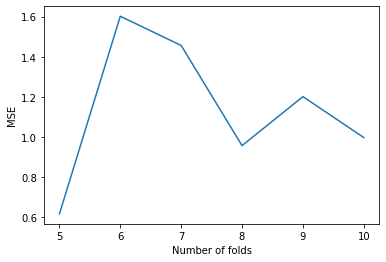

In [2]:
plt.plot(np.arange(5,11), mean_folds_error)
plt.xlabel("Number of folds")
plt.ylabel("MSE")